In [1]:
import sys
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# Plotting script to compare across different smoothing values
# The solution adapts to the number of smoothing values in heta; there must be > 1 value in the list
# or the code will have to be edited

def cplot():
    heta = [0.1, 0.5]
    taus = ['1.0', '1.2', '2.0']
    dpi=300
    A0 = 4.633
    dt=.001
    fig, ax = plt.subplots(len(heta),2,figsize=np.array([15,10]), sharex=True,gridspec_kw={'wspace':.5})
    col_names_a=['x', 'y', 'eta', 'eps', 'rhoB', 'rhoS', 'rhoQ', 'ux', 'uy', 'ueta','Bulk', 'Pixx', 'Pixy', 'Pixeta', 'Piyy', 'Piyeta', 'Pietaeta']
    col_names_s=['id','tau', 'eta', 'p', 'T', 'muB', 'muS', 'muQ', 'eps', 'rhoB',
               'rhoS', 'rhoQ', 's', 'smoothed_s', 'specific_s', 'sigma',
               'norm_spec_s', 'stauRelax', 'bigtheta', "??", "??2",
               'shv00', 'shv11', 'shv22', 'hydro_shv12', 't^2 shv33', 
               'v_eta', 'gamma', 'freeze', 'eos_name']
    for i,h in enumerate(heta):
        for t in taus:
            # reading in and plotting analytical solution
            inp_path_a = os.path.join('long/Analytical','long_tau_'+t+'.dat')
            dfa = pd.read_table(inp_path_a, names=col_names_a, sep=" ", header=1, index_col = False)
            dfa['T'] = (dfa['eps']/3/A0)**(1/4)
            ax[i][0].plot(dfa['eta'], dfa['eps'], color='blue', label='Analytical' if t == taus[0] else "")
            ax[i][1].plot(dfa['eta'], dfa['ueta'], color='blue', label='Analytical' if t == taus[0] else "")
            
            # reading in and plotting CCAKE solution
            idx = int(np.round((float(t)-1)/dt)/100) # calculating the system_state id number based on dt
            inp_path_s = os.path.join(f'long/Sim/h_0.1/rk2',f'system_state_{idx}.dat')
            dfs = pd.read_table(inp_path_s,
                               names=col_names_s,sep=' ',header=1)
            dfs['ueta'] = dfs.loc[:,'v_eta']*dfs.loc[:,'gamma']
            ax[i][0].plot(dfs['eta'], dfs['eps'] / 1000, color='red', ls='--', label='CCAKE' if t == taus[0] else "")
            ax[i][1].plot(dfs['eta'], dfs['ueta'], color='red', ls='--', label='CCAKE' if t == taus[0] else "")
            
            ax[i][0].text(dfa['eta'].iloc[1200], dfa['eps'].iloc[1100], rf'$\tau$ = {t}', color='black', va='center')
            ax[i][1].text(dfa['eta'].iloc[-1], dfa['ueta'].iloc[-1], rf'$\tau$ = {t}', color='black', va='center')


            ax[i][0].legend()
            ax[i][1].legend()

            ax[i][1].set_ylabel(r"$u^{\eta}$")
            ax[i][0].set_ylabel(r"${\epsilon}$")
            ax[i][0].set_xlabel(r"${\eta}$")
            ax[i][1].set_xlabel(r"${\eta}$")

            
            ax[i][0].set_title(f'h = {h}')
            ax[i][1].set_title(f'h = {h}')


            ax[i][0].legend()
            ax[i][1].legend()


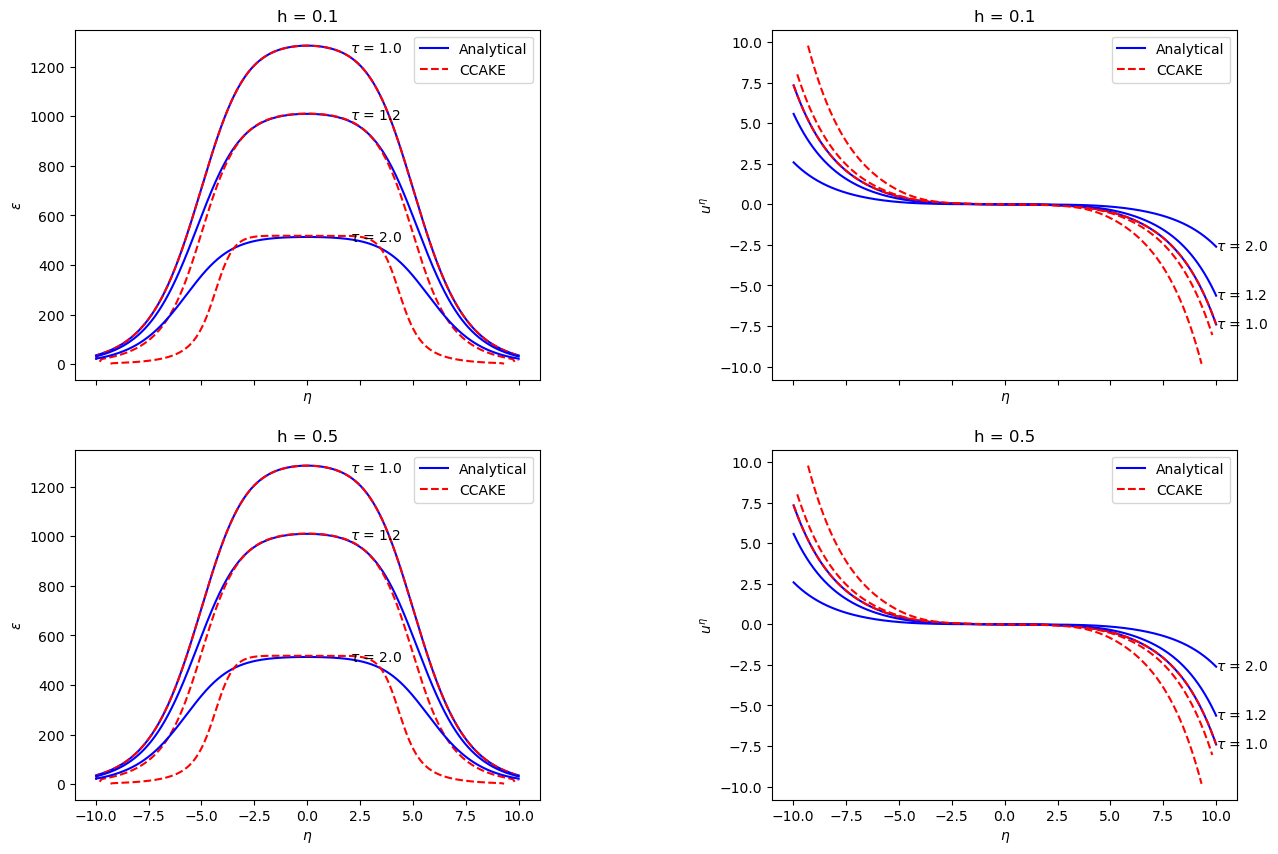

In [7]:
cplot()